<a href="https://colab.research.google.com/github/mitosborn/ChevronChallenge/blob/main/BILL_com.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns

In [ ]:
hotdog = pd.read_csv('training.csv')

In [ ]:
hotdog

,StoreNumber,dayOfTheYear,3HourBucket,GrossSoldQuantity,Cash/Credit Site,EBT Site,Loyalty Site,ExtraMile Site,CoBrand,Alcohol,Carwash,Food Service,City,State
0,1000,1,1,3,False,True,True,True,No,True,False,True,HOUSTON,TX
1,1000,1,2,5,False,True,True,True,No,True,False,True,HOUSTON,TX
2,1000,1,3,6,False,True,True,True,No,True,False,True,HOUSTON,TX
3,1000,1,4,3,False,True,True,True,No,True,False,True,HOUSTON,TX
4,1000,2,1,13,False,True,True,True,No,True,False,True,HOUSTON,TX
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5655,4000,362,2,20,False,False,True,True,No,False,True,True,SAN ANTONiO,TX
5656,4000,362,3,26,False,False,True,True,No,False,True,True,SAN ANTONiO,TX
5657,4000,362,4,37,False,False,True,True,No,False,True,True,SAN ANTONiO,TX
5658,4000,363,3,27,False,False,True,True,No,False,True,True,SAN ANTONiO,TX


In [ ]:
#temp = hotdog[['dayOfTheYear','StoreNumber','GrossSoldQuantity']].groupby(['dayOfTheYear','StoreNumber']).agg('mean').reset_index()

In [ ]:
#sns.lineplot(x = 'dayOfTheYear',y='GrossSoldQuantity',data = temp[temp['StoreNumber'] ==1000])

In [ ]:
hotdog.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5660 entries, 0 to 5659
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   StoreNumber        5660 non-null   int64 
 1   dayOfTheYear       5660 non-null   int64 
 2   3HourBucket        5660 non-null   int64 
 3   GrossSoldQuantity  5660 non-null   int64 
 4   Cash/Credit Site   5660 non-null   bool  
 5   EBT Site           5660 non-null   bool  
 6   Loyalty Site       5660 non-null   bool  
 7   ExtraMile Site     5660 non-null   bool  
 8   CoBrand            5660 non-null   object
 9   Alcohol            5660 non-null   bool  
 10  Carwash            5660 non-null   bool  
 11  Food Service       5660 non-null   bool  
 12  City               5660 non-null   object
 13  State              5660 non-null   object
dtypes: bool(7), int64(4), object(3)
memory usage: 348.3+ KB


In [ ]:
def transform_TF(boolean):
  if boolean == 'No':
    return 0
  elif boolean == 'Yes':
    return 1
  elif boolean:
    return 1
  else: 
    return 0
hotdog['Loyalty Site'].map(transform_TF)
cty_map = {'HOUSTON':0,'AUSTIN':1,'COLLEGE STATION':2,'SAN ANTONiO':3} 

In [ ]:
#Convert True and Yes to 1, False and No to 0. Additionally, convert city names to numbers
for col in hotdog.columns[4:-2]:
  hotdog[col] = hotdog[col].map(transform_TF)
hotdog['City'] = hotdog['City'].map(cty_map)  

In [ ]:
hotdog.columns

Index(['StoreNumber', 'dayOfTheYear', '3HourBucket', 'GrossSoldQuantity',
       'Cash/Credit Site', 'EBT Site', 'Loyalty Site', 'ExtraMile Site',
       'CoBrand', 'Alcohol', 'Carwash', 'Food Service', 'City', 'State'],
      dtype='object')

In [ ]:
hotdog[['Cash/Credit Site', 'EBT Site', 'Loyalty Site', 'ExtraMile Site',
       'CoBrand', 'Alcohol', 'Carwash', 'Food Service','City']].drop_duplicates()

,Cash/Credit Site,EBT Site,Loyalty Site,ExtraMile Site,CoBrand,Alcohol,Carwash,Food Service,City
0,0,1,1,1,0,1,0,1,0
1413,0,0,1,1,0,0,0,1,1
2830,0,1,1,1,0,1,1,1,2
4243,0,0,1,1,0,0,1,1,3


In [ ]:
#new_hotdog = hotdog[['StoreNumber','EBT Site',
#      'Alcohol', 'Carwash','City']]

In [ ]:
#new_hotdog.drop_duplicates()

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split


X = hotdog[['dayOfTheYear','StoreNumber','EBT Site',
       'Alcohol', 'Carwash','3HourBucket','City']]
y = hotdog[['GrossSoldQuantity']]
train_X, test_X, train_y, y_test = train_test_split(X , y, test_size = 0.2) 

clf = RandomForestRegressor(n_estimators=100)
clf.fit(train_X, train_y)
y_pred_rf=clf.predict(test_X)
acc_rf= round(clf.score(train_X, train_y) * 100,3)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()


In [ ]:
y_pred_rf

array([13.03,  5.29,  9.03, ..., 18.84,  8.34, 30.48])

In [ ]:
acc_rf

94.827

In [ ]:
y_test

,GrossSoldQuantity
3187,28
2057,5
2953,4
405,1
1215,4
...,...
3910,5
409,3
4714,30
566,7


In [ ]:
import math
import numpy as np

new_y = [x[0] for x in np.array(y_test)]
data = pd.DataFrame(columns = ['predict','real'])
data['predict'] = pd.Series(y_pred_rf).round().astype(int)
data['real'] = new_y
data['diff'] = abs((data['predict']-data['real'])/data['real'])


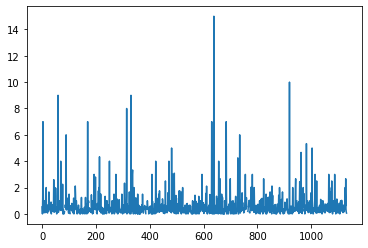

In [ ]:
data['diff'].plot()

In [ ]:
data['predict']

0       13
1        5
2        9
3        8
4       11
        ..
1127     8
1128    11
1129    19
1130     8
1131    30
Name: predict, Length: 1132, dtype: int64

In [ ]:
sum(abs(np.subtract(new_y,y_pred_rf))<0.5)/len(new_y)

0.07243816254416961